# Question 1

Description of approach: I will create a new column in the dataframe by adding together 4 other columns of the data frame.

In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
    

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

In [4]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' '\
+ df['ZIPCODE']

df['RESTAURANT'][0:10]


0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Question 2


Description of approach: Created a new variable that contains the dataframe without duplicates. Used the drop_duplicates function to remove the duplicated restaurant's on the basis of the column 'RESTAURANT'.

In [5]:
restaurant_dedup = df.drop_duplicates(subset='RESTAURANT')

print "Before removing duplicates, restaurants in data =", len(df)
print "After removing duplicates, restaurants in data =", len(restaurant_dedup)

Before removing duplicates, restaurants in data = 44633
After removing duplicates, restaurants in data = 10114


# Question 3

Description of approach: I will use this list without duplicates and get the value counts for each DBA. I will then add a mask the DBA's of count > 1 to display only the count for each DBA who is a chain.

In [6]:
chains = restaurant_dedup['DBA'].value_counts()
mask = (chains > 1)
print "The data has " + str(len(chains[mask])) + " chain restuarants"


The data has 368 chain restuarants


# Question 4

Description of approach: I will use the value counts computed in Question 3, and create a variable that holds the top 20 chain resturants (resturants with highest value counts = most popular resturants). I will then plot these 20 restuarants in a bar graph.

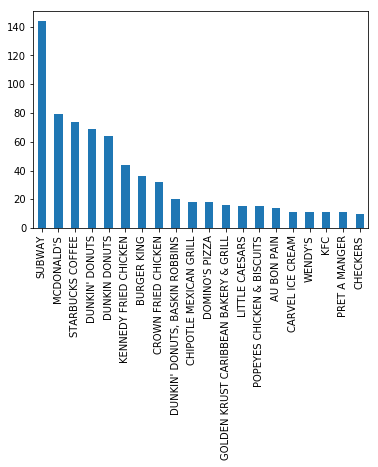

In [7]:
topchains = chains[:20]
topchains
topchains.plot(kind='bar')

# Question 5

Description of approach: Use the length of the masked chains dataframe made in question 3 to only grab chains i.e. resturants with value greater than 1. Divide this number by the length of the entire no duplicate dataframe. I will also turn both lengths into floats.

In [8]:
print float(len(chains[mask]))/float(len(restaurant_dedup)), "or about 3.64%."


0.0363852086217 or about 3.64%.


# Question 6

Description of approach: First I created a series that had each restaurant name and the total count it appeared in the non duplicate data (representing each store). I then used a mask to create a series with only non chain restaurants. I turned this series into a dataframe, and reassigned the index and column names. I then merged this dataframe with the non duplicate data frame on the DBA column so that I could get each boro for each store. I then replaced the "Missing" data with Nan so pandas would realize it was truyl missing and not a boro. I finally counted the total stores in each boro using the value counts function and ploted a bar graph.

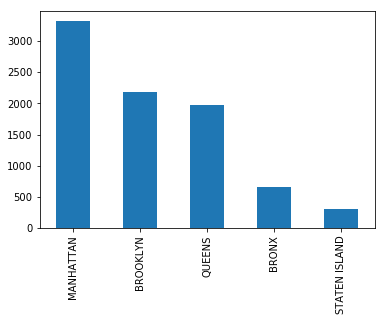

In [9]:
non_chain_restaurants = restaurant_dedup['DBA'].value_counts()
mask2 = (non_chain_restaurants <= 1)
non_chain = non_chain_restaurants[mask2].to_frame().reset_index(drop=False)
non_chain.columns = ['DBA', 'COUNT']

new_non_chain = non_chain.merge(restaurant_dedup,
                                   left_on='DBA',
                                  right_on='DBA')

removedmissing = new_non_chain.replace('Missing', np.NaN)
#finaldata = removedmissing.dropna()

removedmissing['BORO'].value_counts().plot(kind='bar')

# Question 7

Description of approach: Remove the missing from the non duplicate dataset and then get a total count of all restaurants by boros. Use the removedmissing dataframe to get the count of not chain resturants by boro. Divide these two series by one another to form a new series. Sort the series from largest to smallest and then plot the bar graph.

ANSWER: The boro with the most independent restaurants is not the boro with the highest ratio of independent restaurants.

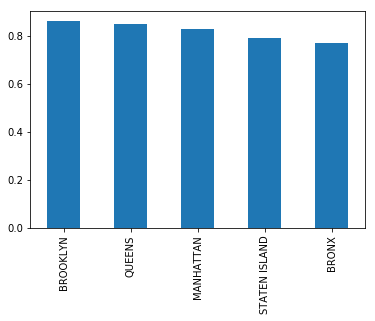

In [10]:
notchainborocounts = removedmissing['BORO'].value_counts()

borocounts = restaurant_dedup.replace('Missing', np.NaN)
finalborocounts = borocounts['BORO'].value_counts()

independent_boro = notchainborocounts/finalborocounts
independent_boro.sort_values(inplace=True, ascending=False)

independent_boro.plot(kind='bar')

# Question 8

Description of approach: Using the non duplicates dataframe, counted restaurants by cuisine type to see the most popular cuisines and plotted the top 20

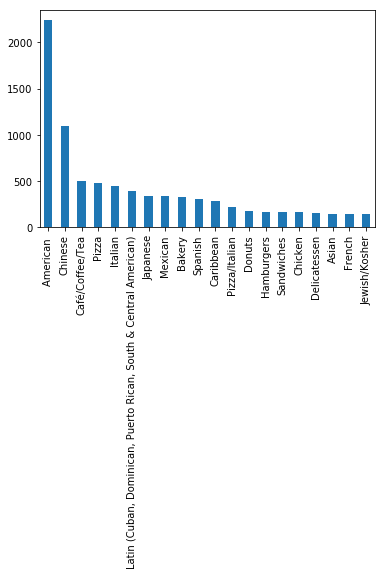

In [11]:
top20cuisine = restaurant_dedup['CUISINE DESCRIPTION'].value_counts()
top20cuisine[:20].plot(kind='bar')

# Question 9


Description of approach: Make two dataframes, one consisting of not null violation codes and the other consiting of null violation codes. Cross reference these two dataframes to create a mask that removes resturants who have ever had one violation from the null dataframe. Count the values of the restaurants who have never had a violation, and plot them in a bar graph. 

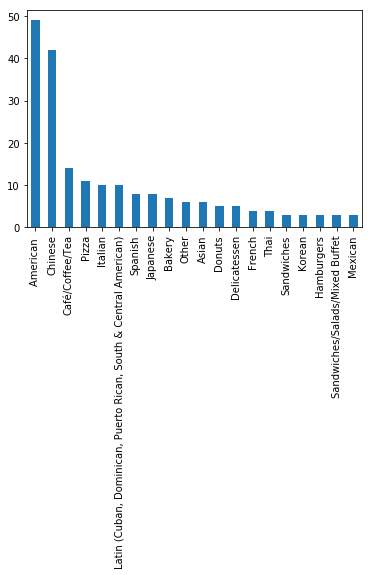

In [12]:
cleanrestaurant = df[['RESTAURANT', 'VIOLATION CODE', 'CUISINE DESCRIPTION']]

# create the masks for violations and no violations
maskvc = cleanrestaurant['VIOLATION CODE'].notnull()
masknovc = cleanrestaurant['VIOLATION CODE'].isnull()

# create the dataframes using the masks
vc = cleanrestaurant[maskvc]
novc = cleanrestaurant[masknovc]

# drop duplicate restaurants
cleanvc = vc.drop_duplicates(subset='RESTAURANT')
cleannovc = novc.drop_duplicates(subset='RESTAURANT')

#create mask for restaurants who appear in both dataframes 
restaurantmask = ~cleannovc['RESTAURANT'].isin(cleanvc['RESTAURANT'])

#create newdatframe
veryclean = cleannovc[restaurantmask]
final = veryclean[['RESTAURANT', 'CUISINE DESCRIPTION']]
lastfinal = final['CUISINE DESCRIPTION'].value_counts()

lastfinal[:20].plot(kind='bar')

# Question 10

Description of approach: Use the non duplicate list to count the number of restaurants per cuisine and the use a mask function to pick only those cuisines with at least 20 resturants represented. Turn this into a dataframe. Use the passed inspection numbers from q.9 and turn that series into a dataframe as well. Merge the two dataframes on "CUISINE DESCRIPTION" and then add a new column where you divide the inspections passed by the total number of rows for each cuisine. Display the top 10 highest ratios (cleanest cuisines).

In [13]:
#selectin cuisines that have at least 20 restaurants 
restaurant_dedup = df.drop_duplicates(subset='RESTAURANT')
cc= restaurant_dedup['CUISINE DESCRIPTION'].value_counts() 
cuisinemask = (cc >= 20)

newdf = cc[cuisinemask].to_frame().reset_index(drop=False)
newdf.columns = ['CUISINE DESCRIPTION', 'RSTCOUNT']

newnovc = lastfinal.to_frame().reset_index(drop=False)
newnovc.columns = ['CUISINE DESCRIPTION', "PASSED"]

cleanc = newdf.merge(newnovc, left_on='CUISINE DESCRIPTION', right_on='CUISINE DESCRIPTION')
cleanc['RATIO'] = cleanc['PASSED'] / cleanc['RSTCOUNT']
top10 = cleanc.sort_values('RATIO', ascending=False)[:10]
top10[['CUISINE DESCRIPTION','RATIO']]



,CUISINE DESCRIPTION,RATIO
37,Soul Food,0.090909
35,Vietnamese/Cambodian/Malaysia,0.062500
24,Other,0.058252
40,Soups & Sandwiches,0.047619
39,Barbecue,0.047619
38,Continental,0.047619
17,Asian,0.041096
1,Chinese,0.038251
31,Greek,0.036364
36,Peruvian,0.035714


# Question 11

Description of approach: First I will replace the 'Missing' values for boro with Nan, so the dataframe recognizes they are missing. Then I will create a new dataframe using a mask that only has restaurants with violations in them (we don't want to use non duplicated datafreame here becuase we are counting all the violations). Next I will create a crosstable that counts each violation description by boro. I will then use the idx.max function to get the max violation for each boro. 

In [14]:
df1 = df.replace('Missing', np.NaN)
violationmask = df1['VIOLATION CODE'].notnull()
violationdf = df1[violationmask]
crosstable1 = pd.crosstab(violationdf['VIOLATION DESCRIPTION'], violationdf['BORO'])

crosstable1

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,92,16
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",27,120,162,85,17
Ashtray present in smoke-free area.,4,4,5,8,1
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",20,93,168,80,10
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0,4,6,5,1


In [15]:
crosstable1.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# Question 12

Description of approach: Sum up the columns of each row to get the total number of times that violation description occured in the data. Transpose the data frame so we get the rows to be the boros and the violation descriptions to be the columns. Divide the data in each column by the violation frequency. Transpose the table back to normal and use the idxmax function to get the top violation descriptions after normalization. 

In [16]:
violationFrequency = crosstable1.sum(axis=1)
standardfreq = crosstable1.T/violationFrequency
finaldf = standardfreq.T
finaldf

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",0.088889,0.296296,0.362963,0.214815,0.037037
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,0.058824,0.294118,0.352941,0.235294,0.058824
''''Wash hands sign not posted at hand wash facility.,0.087866,0.238494,0.389121,0.251046,0.033473
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",0.079365,0.190476,0.301587,0.380952,0.047619
Accurate thermometer not provided in refrigerated or hot holding equipment.,0.069307,0.250825,0.323432,0.303630,0.052805
"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",0.065693,0.291971,0.394161,0.206813,0.041363
Ashtray present in smoke-free area.,0.181818,0.181818,0.227273,0.363636,0.045455
"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",0.053908,0.250674,0.452830,0.215633,0.026954
"Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.",0.000000,0.250000,0.375000,0.312500,0.062500


In [17]:
finaldf.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

# Question 13

Description of approach: I will create a new series that holds areacodes and zipcodes. I will use the phone column to extract the first 3 numbers to create the arecode column. I will then turn this into a cross table with area codes as the rows and zip codes as the columns. If there is only one zipcode per row, then only one column in the row will have a number other than 0. To count how many columns in each row are a number other than 0 I will use the .astype() function and the .sum() function. I will then turn this output into a dataframe, rename the columns, create a mask for the dataframe that only shows those who have a 'ZIPCODECNT' of 1 or less. I will then take the length of this masked dataframe to find out how many area codes belong to just one zipcode.

In [18]:
restaurants = restaurant_dedup.copy()
restaurants['AREACODE'] = restaurants['PHONE'].str[:3]
phone_zip = restaurants[['AREACODE', 'ZIPCODE']]


crostablepz = pd.crosstab( phone_zip['AREACODE'], phone_zip['ZIPCODE'])


zipcode_per_areacode = crostablepz.astype(bool).sum(axis=1)
newzpac= zipcode_per_areacode.to_frame().reset_index(drop=False)
newzpac.columns = ['AREACODE', 'ZIPCODECNT']
newzpac

maskcount = (newzpac['ZIPCODECNT'] <= 1)
finalziparea = newzpac[maskcount]
print 'There are ',str(len(finalziparea))," areacodes that correspond to only one zipcode."
finalziparea

There are  34  areacodes that correspond to only one zipcode.


,AREACODE,ZIPCODECNT
0,000,1
1,171,1
2,175,1
3,191,1
5,202,1
6,206,1
10,281,1
11,303,1
12,305,1
14,404,1


# Question 14

Description of approach: First I will create a new column called street type from the non_duplicate dataframe. I will split the string so I only grab the last word from the string as the new data for the colum streettype. Then I will create another column called street base using all the words in the street column besides the last one. Using these two new columns I will create anthoer column called street base & zip so that every resturant has a unique street and zipcode. I now create a new dataframe that contains the three new columns which I created. I will merge this dataframe with itself and create a new dataframe that only show the rows in which street type of one dataframex does not equal street type of dataframey. Finally I will drop the duplicates from this list and then create a cross table with street typex and street type y. I will then find the column max for AVE, ST, RD, PL, BOULEARD, and BOULEVARD using idmax.

In [39]:
###split the street name into last word column and everything but last word column
newrestaurant = restaurant_dedup.copy()
newrestaurant['STREET TYPE'] = newrestaurant['STREET'].str.split().str[-1]
newrestaurant['SB'] = newrestaurant['STREET'].str.split().str[:-1]

###format SB into STREET BASE with no []
streetbaselist = []

for i in newrestaurant['SB']:
    i = ' '.join(i)
    streetbaselist.append(i)

newrestaurant['STREET BASE'] = streetbaselist

#clear out empty street base rows
newrestaurant1 = newrestaurant[~newrestaurant['STREET BASE'].str.contains("\w") == False]
del newrestaurant1['SB']
street_zip_index = newrestaurant1.copy()

### create a new table with just those three columns
street_zip_index['STREET BASE & ZIP'] = street_zip_index['STREET BASE'] + ' ' + street_zip_index['ZIPCODE']

#delete duplicates
base_zip_type = street_zip_index[['STREET BASE & ZIP', 'STREET BASE', 'STREET TYPE']]

#merge database with itself
mergeddf = base_zip_type.merge(base_zip_type, left_on='STREET BASE & ZIP', right_on='STREET BASE & ZIP')

# only show those who street type are not equal
notequaldf = mergeddf.loc[mergeddf['STREET TYPE_x'] != mergeddf['STREET TYPE_y']]
finaldf = notequaldf.drop_duplicates(subset= ['STREET BASE & ZIP'], inplace=False) #are we droppping on this#

#crosstab
crosstabstreets = pd.crosstab(finaldf['STREET TYPE_x'], finaldf['STREET TYPE_y'])
crosstabstreets
crosstabstreets.idxmax()[["AVE", "ST", "RD", "PL", "BOULEARD", "BULEVARD"]]


STREET TYPE_y
AVE            AVENUE
ST             STREET
RD               ROAD
PL              PLACE
BOULEARD    BOULEVARD
BULEVARD    BOULEVARD
dtype: object